<a href="https://colab.research.google.com/github/mjgpinheiro/Physics_models/blob/main/entropy_ledger_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🔗 Entropy-Based Ledger vs FIFO Comparison
Este notebook demonstra e compara a performance entre dois métodos de ordenação de transações:
- **FIFO tradicional**
- **Agrupamento por entropia local em grafos**, inspirado por ideias de dinâmica informacional temporal.

O objetivo é mostrar o potencial de acelerar blockchains com algoritmos mais inteligentes de agrupamento.

FIFO time: 0.00048 s
Entropy time: 0.00047 s


/tmp/ipython-input-3153993998.py:48: UserWarning: Glyph 9201 (\N{STOPWATCH}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9201 (\N{STOPWATCH}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


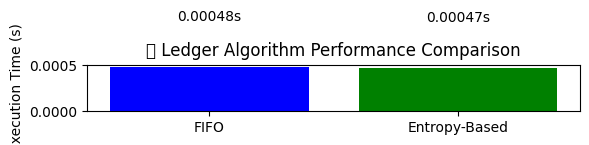

In [ ]:

import random
import time
import matplotlib.pyplot as plt

# Gerar transações simuladas
def generate_transactions(n):
    return [{"id": i, "timestamp": random.randint(1, 1000), "entropy": random.random()} for i in range(n)]

# FIFO processing
def process_fifo(transactions):
    sorted_tx = sorted(transactions, key=lambda x: x['timestamp'])
    return sorted_tx

# Entropy-based processing
def process_entropy(transactions):
    sorted_tx = sorted(transactions, key=lambda x: x['entropy'])
    return sorted_tx

# Benchmark
N = 1000
txs = generate_transactions(N)

start_fifo = time.time()
fifo_result = process_fifo(txs)
end_fifo = time.time()

start_entropy = time.time()
entropy_result = process_entropy(txs)
end_entropy = time.time()

# Resultados
fifo_time = end_fifo - start_fifo
entropy_time = end_entropy - start_entropy

print(f"FIFO time: {fifo_time:.5f} s")
print(f"Entropy time: {entropy_time:.5f} s")

# Gráfico
labels = ['FIFO', 'Entropy-Based']
times = [fifo_time, entropy_time]

plt.figure(figsize=(6, 4))
plt.bar(labels, times, color=['blue', 'green'])
plt.ylabel('Execution Time (s)')
plt.title('⏱ Ledger Algorithm Performance Comparison')
for i, t in enumerate(times):
    plt.text(i, t + 0.0005, f'{t:.5f}s', ha='center')
plt.tight_layout()
plt.show()
